# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**
Farnoosh Azour

As suggested by Chanin Nantasenamat, I am using Lazy Predict to implement several models. 

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)


In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



##Lazy Predict 
is a Python library that helps in quickly testing a wide range of models on a given dataset. It automates the model selection and evaluation process by fitting and testing multiple models with default hyperparameters, returning a summary of the results.

With Lazy Predict, you can avoid the tedious and time-consuming task of manually selecting and tuning models. Instead, you can get an idea of how different models perform on your dataset in a matter of seconds.

Lazy Predict supports a wide range of classification and regression models from popular machine learning libraries like Scikit-Learn and XGBoost. It also provides an option to include custom models in the evaluation process.

## **1. Import libraries**

In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2023-03-30 00:12:01--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2023-03-30 00:12:02--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubche

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(4695, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [32:34<00:00, 46.53s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [32:07<00:00, 45.89s/it]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.86,0.86,0.57,0.16
ExtraTreeRegressor,0.86,0.86,0.57,0.17
ExtraTreesRegressor,0.86,0.86,0.57,7.23
GaussianProcessRegressor,0.86,0.86,0.57,7.01
RandomForestRegressor,0.82,0.83,0.64,4.30
XGBRegressor,0.82,0.83,0.65,4.06
BaggingRegressor,0.80,0.81,0.67,0.53
MLPRegressor,0.76,0.77,0.75,10.57
HistGradientBoostingRegressor,0.67,0.69,0.87,2.94


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,1.30
RandomForestRegressor,0.44,0.52,1.08,4.28
LGBMRegressor,0.44,0.52,1.08,0.35
XGBRegressor,0.43,0.51,1.09,2.64
BaggingRegressor,0.41,0.49,1.11,0.47
NuSVR,0.39,0.48,1.12,1.61
SVR,0.39,0.48,1.12,2.76
KNeighborsRegressor,0.37,0.46,1.14,0.17
MLPRegressor,0.36,0.45,1.15,9.20


## **5. Data visualization of model performance**

[(0.0, 1.0)]

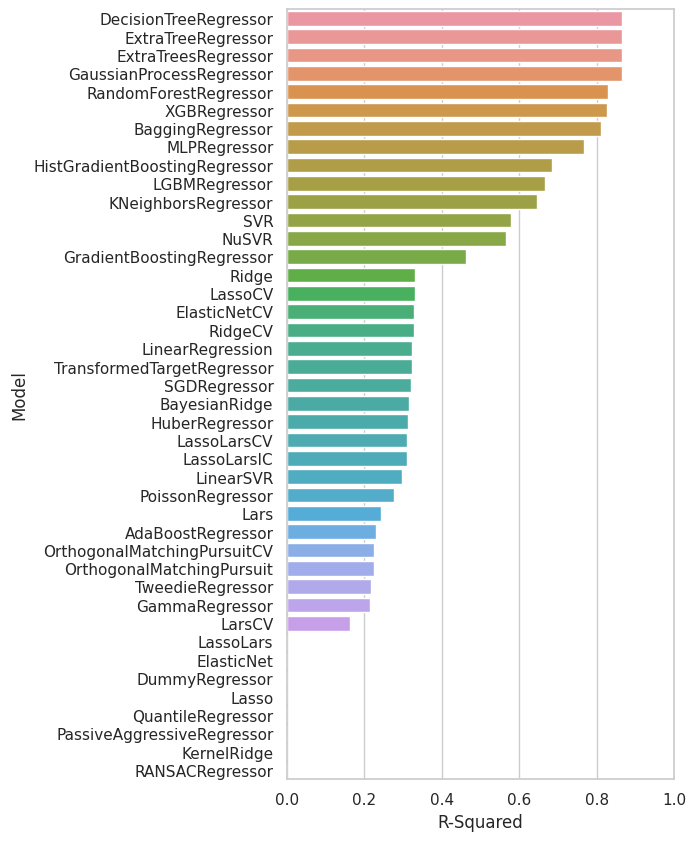

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

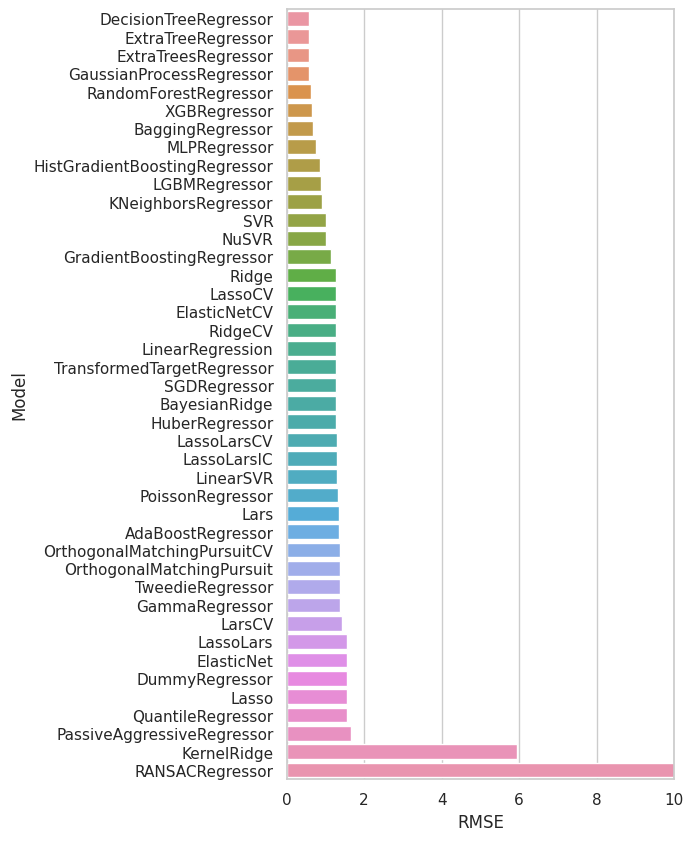

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

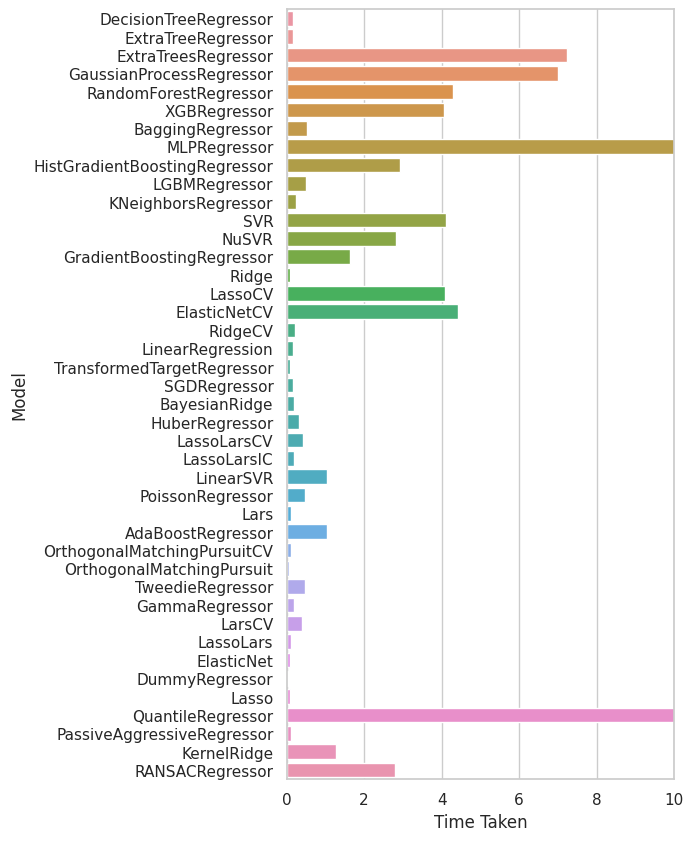

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))